<div class="alert alert-block alert-success">
    <b>ARTIFICIAL INTELLIGENCE (E016350A)</b> <br>
ALEKSANDRA PIZURICA <br>
GHENT UNIVERSITY <br>
AY 2024/2025 <br>
Assistant: Nicolas Vercheval
</div>

# Binary Classification
This notebook considers a binary classification setup, a task where we classify data into two distinct classes.

## Logistic Regression
Logistic regression embeds a linear model into the logistic function, using the score $z = \textbf{w}\cdot\textbf{x}$:
$$Logistic(z) = \frac{1}{1 + e^{-z}}.$$

The logistic function squeezes the linear model between $0$ and $1$, and its output can be interpreted as a probability.
In a binary classification setup, the model associates this probability with the probability that a sample $\textbf{x}$ belongs to the second class, usually identified with the label $1$.

The logistic regression model $h_{\textbf{w}}$ is the following:
$$h_{\textbf{w}}(\textbf{x}) = Logistic(\textbf{w}\cdot\textbf{x})  = \frac{1}{1 + e^{-\textbf{w}\cdot\textbf{x}}}.$$


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_circles
%matplotlib inline

### Visualizing the Data
We are going to use a synthetic dataset with a challenging geometry and noise.

In [2]:
def plot_dataset(X, y):
    plt.figure(figsize=(7,5))
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=80)
    ax.legend(['Class 0', 'Class 1'])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Scatter plot of training data')

In [3]:
def generate_data(n_samples, random_state, geometry='moons'):
    if geometry == 'moons':
        return make_moons(n_samples=n_samples, random_state=random_state, noise=0.2)
    if geometry == 'circles':
        return make_circles(n_samples=n_samples, factor=0.5, random_state=random_state, noise=0.1)
    raise ValueError(f'Geometry "{geometry}" not supported')

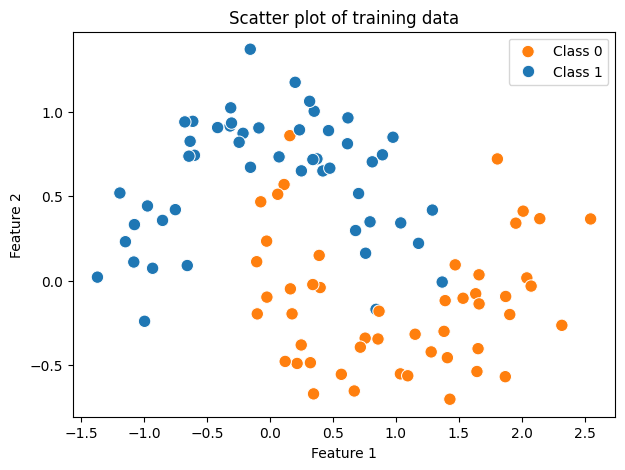

In [4]:
# get dataset
n_samples = 100
X, y = generate_data(n_samples=n_samples, random_state=42)
# plot dataset
plot_dataset(X, y)
plt.show()

### Vizualizing the logistic function
The logistic function is also known as the sigmoid.

In [5]:
def sigmoid(z):
    value = 1 / (1 + np.exp(-z))
    return value

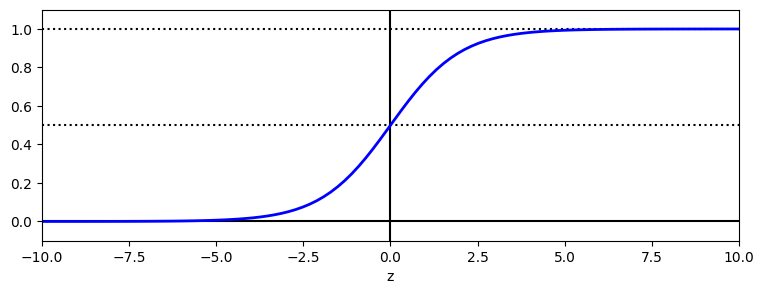

In [6]:
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))

# display cartesian plot
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([0, 0], [-1.1, 1.1], "k-")

# plot asymptotes
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")

# plot sigmoid
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### Creating and training a model

In [7]:
# get the model
logistic = LogisticRegression()

# train the model
logistic.fit(X, y)

# get the model coefficients
weights = logistic.coef_[0]
bias = logistic.intercept_

### Decision boundary
The samples predicted to be of class $1$ are **above** the decision boundary.


In [8]:
def plot_boundary(weights, bias):
    x_values =  np.linspace(-1.5, 2.5, 100)
    plt.plot(x_values, -1 / weights[1] * (weights[0] * x_values + bias))

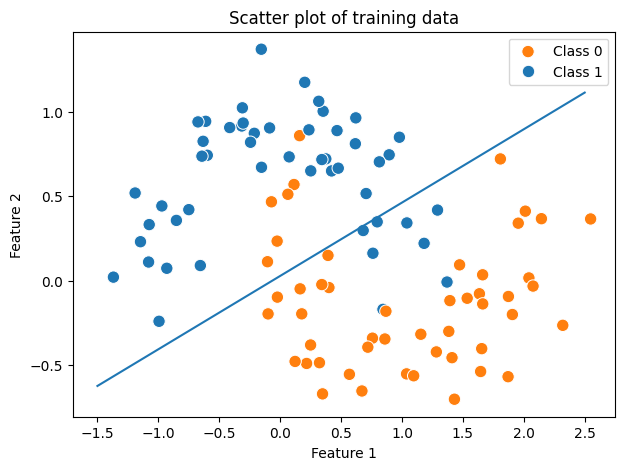

In [9]:
# plot dataset
plot_dataset(X, y)
plot_boundary(weights, bias)
plt.show()

### Evaluating Logistic Regression

Let us produce a test dataset by changing the random seed. Accuracy is the most intuitive metrics for classification. You are going to explore others in the assignment.

In [10]:
n_test_samples = 100
X_test, y_test = generate_data(n_samples=n_test_samples, random_state=12)

predictions = logistic.predict(X_test)

# simple calculation
accuracy = (predictions == y_test).sum() / n_test_samples
#accuracy = sklearn.metrics.accuracy_score(y_test, predictions)

print(f"The accuracy is {100 * accuracy:.2f}%.")

The accuracy is 85.00%.


## Improving the model
Now that we have seen the basic functioning of logistic regression, let us tweak it to improve its predictive power.

### Regularized model
We add some regularization to make the model more resistant to noise.

In [11]:
# C is inversely proportional to the parameter for regularization
reg_logistic = LogisticRegression(C=0.1)

# train the model
reg_logistic.fit(X, y)

# get the model coefficients
weights = reg_logistic.coef_[0]
bias = reg_logistic.intercept_

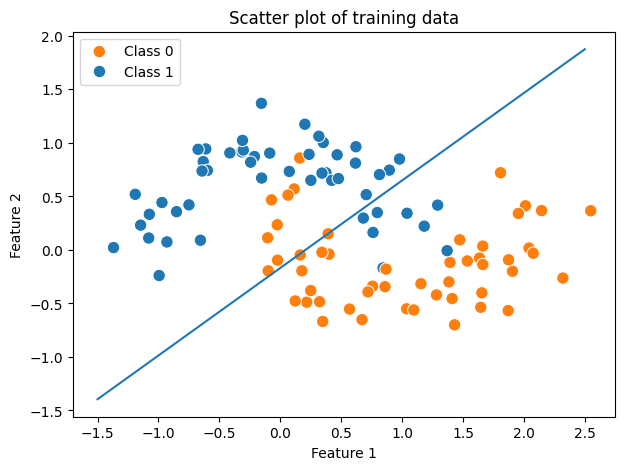

In [12]:
# plot dataset
plot_dataset(X, y)
plot_boundary(weights, bias)
plt.show()

### Evaluating Logistic Regression
The regularization makes the boundary decision close to the line $f(x) = x $. This is because the model gives a similar importance to Feature 1 ($x$) and Feature 2 ($f(x)$). Overall, this does not seem to help generalization.

In [13]:
predictions = reg_logistic.predict(X_test)

# sklearn implements accuracy and many other metrics
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)

print(f"The accuracy is {100 * accuracy:.2f}%.")

The accuracy is 82.00%.


### Feature engineering.
Our data is non-linear. Feature engineering allows us to use a linear model to model non-linear data.
The model will be linear on certain features, not our original data.

In [14]:
def add_second_order(X):
    features = [X]
    features.extend([X ** 2, X[:, :1] * X[:, 1:]])
    return np.hstack(features)


In [15]:
# add the squares of the attributes and their multiplication as new attributes
X_ext = add_second_order(X)
logistic_ext = LogisticRegression()

# train the model
logistic_ext.fit(X_ext, y)

# get the model coefficients
weights = logistic_ext.coef_[0]
bias = logistic_ext.intercept_

In [16]:
# boundary for the extended dataset
def plot_second_order_boundary(weights, bias):
    
    # the polynomial function corresponding to the feature engineering
    def polynomial(x, y):
        values = np.stack([x, y, x ** 2, y ** 2, x * y], axis=-1)
        return np.dot(values, weights) + bias
    
    # domain for graph
    x_values = np.linspace(-1.5, 2.5, 400)
    y_values = np.linspace(-1, 1.5, 400)
    
    # values in a form of a matrix for x and y
    X_values, Y_values = np.meshgrid(x_values, y_values) 
    
    # evaluate the polynomial function at each point in the meshgrid
    Z_values = polynomial(X_values, Y_values)
    
    # plot the zero contour
    plt.contour(X_values, Y_values, Z_values, levels=[0], colors='r')



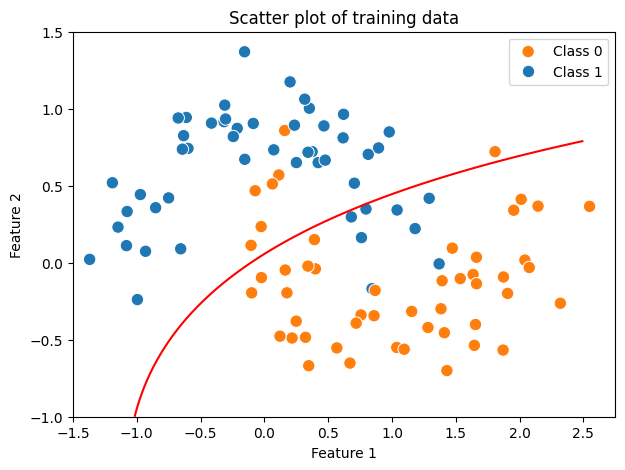

In [17]:
# plot dataset
plot_dataset(X, y)
plot_second_order_boundary(weights, bias)
plt.show()

In [18]:
# create the same features for the test dataset
X_test_ext = add_second_order(X_test)
predictions = logistic_ext.predict(X_test_ext)

# sklearn implements accuracy and many other metrics
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)

print(f"The accuracy is {100 * accuracy:.2f}%.")

The accuracy is 86.00%.
